In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [91]:
dataset = pd.read_csv('C:/Users/Cathryn/Programming/Python/ML_Minimizing_Churn_Rate/P39-Minimizing-Churn-Data/churn_data.csv')

In [92]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [93]:
dataset.shape

(27000, 31)

In [94]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [95]:
#removing NaN
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [96]:
# remove rows with na's in age column
dataset = dataset[pd.notnull(dataset['age'])]

In [97]:
#removes columns with too many na's to remove by row
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [98]:
#double check that columns got dropped
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'deposits', 'withdrawal',
       'purchases_partners', 'purchases', 'cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'cc_application_begin', 'app_downloaded',
       'web_user', 'app_web_user', 'ios_user', 'android_user',
       'registered_phones', 'payment_type', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred'],
      dtype='object')

In [99]:
dataset2 = dataset.drop(columns =['user', 'churn'])

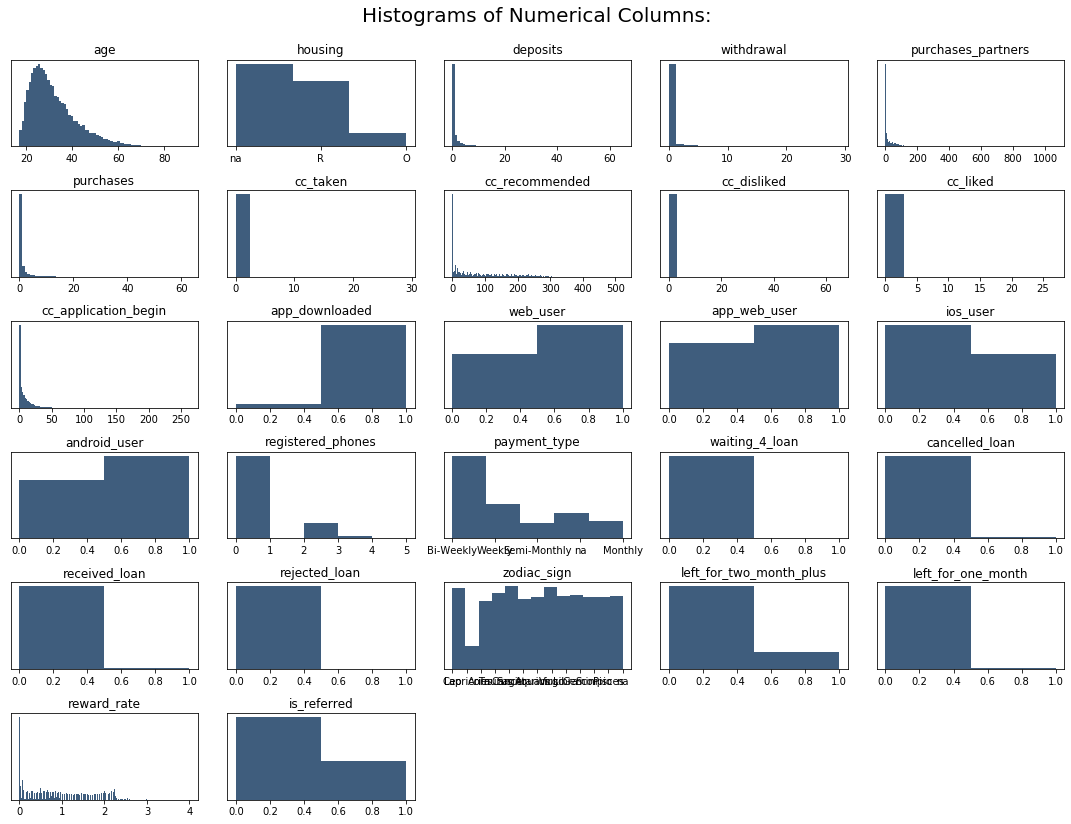

In [100]:
#creates a histogram to visualize the data
fig = plt.figure(figsize =(15,12))
plt.suptitle('Histograms of Numerical Columns:', fontsize = 20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = '#3F5D7D')
plt.tight_layout(rect = [0, .03, 1, .95])

In [101]:
#creates pie charts to get percentage of boolean values
dataset_binary = dataset[['received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month',
       'is_referred','housing','cc_taken', 'cc_recommended',
       'cc_disliked', 'cc_liked', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'waiting_4_loan', 'cancelled_loan',]]

In [102]:
dataset_binary.columns

Index(['received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'is_referred', 'housing', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'app_downloaded',
       'web_user', 'ios_user', 'android_user', 'waiting_4_loan',
       'cancelled_loan'],
      dtype='object')

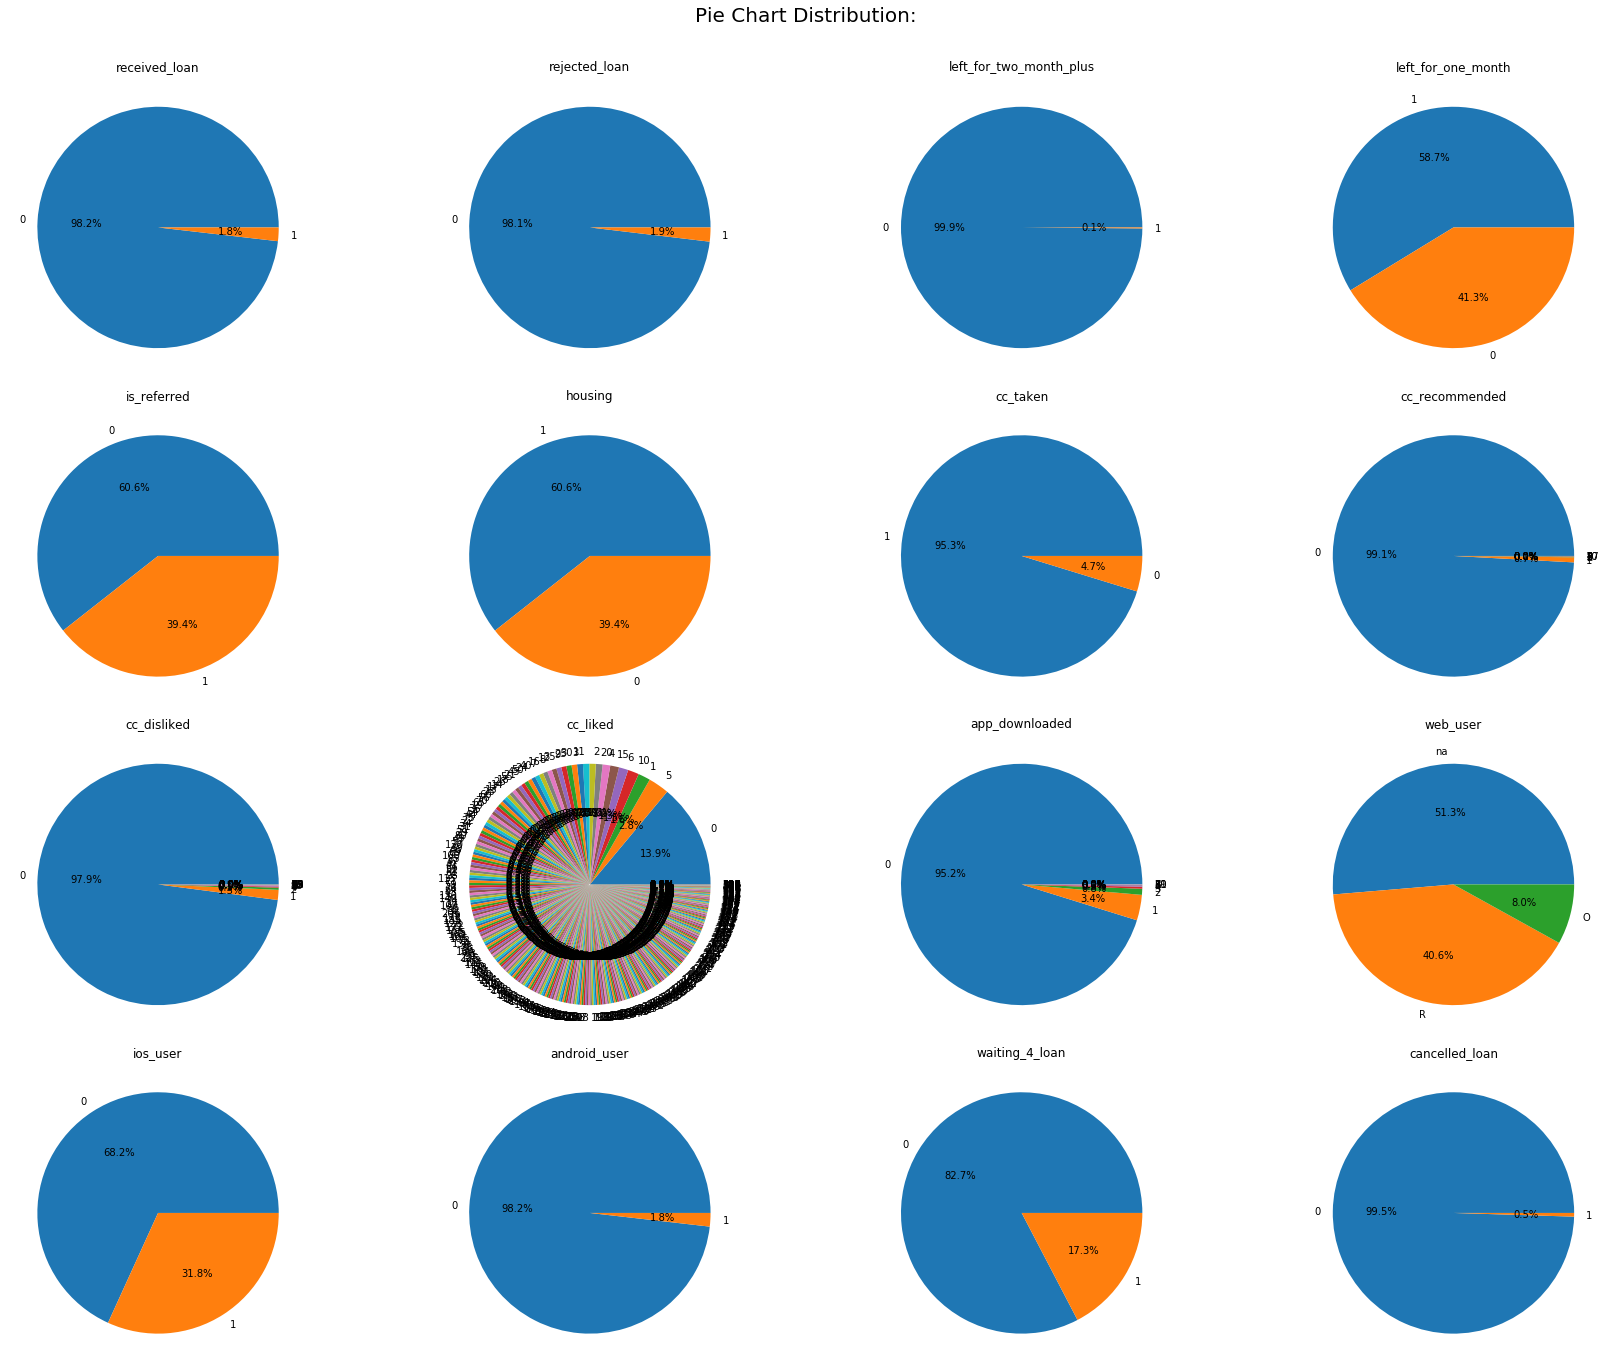

In [103]:
fig = plt.figure(figsize =(25,20))
plt.suptitle('Pie Chart Distribution:', fontsize = 20)
for i in range(1, dataset_binary.shape[1] + 1):
    plt.subplot(4, 4, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset_binary.columns.values[i - 1])
    values=dataset_binary.iloc[:, 1-i].value_counts(normalize=True).values
    index=dataset_binary.iloc[:, 1-i].value_counts(normalize=True).index
    
    plt.pie(values, labels=index,autopct='%1.1f%%')
    #plt.axis=('equal')
plt.tight_layout(rect = [0, .03, 1, .95])

In [104]:
dataset[dataset_binary.left_for_two_month_plus== 1].churn.value_counts()

0    2719
1    1964
Name: churn, dtype: int64

In [105]:
dataset[dataset_binary.received_loan== 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [106]:
dataset[dataset_binary.rejected_loan== 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [107]:
dataset[dataset_binary.cc_recommended== 1].churn.value_counts()

1    266
0    174
Name: churn, dtype: int64

In [108]:
dataset[dataset_binary.cc_disliked== 1].churn.value_counts()

1    215
0    148
Name: churn, dtype: int64

In [109]:
dataset[dataset_binary.android_user== 1].churn.value_counts()

0    9531
1    6322
Name: churn, dtype: int64

In [110]:
dataset[dataset_binary.cancelled_loan== 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

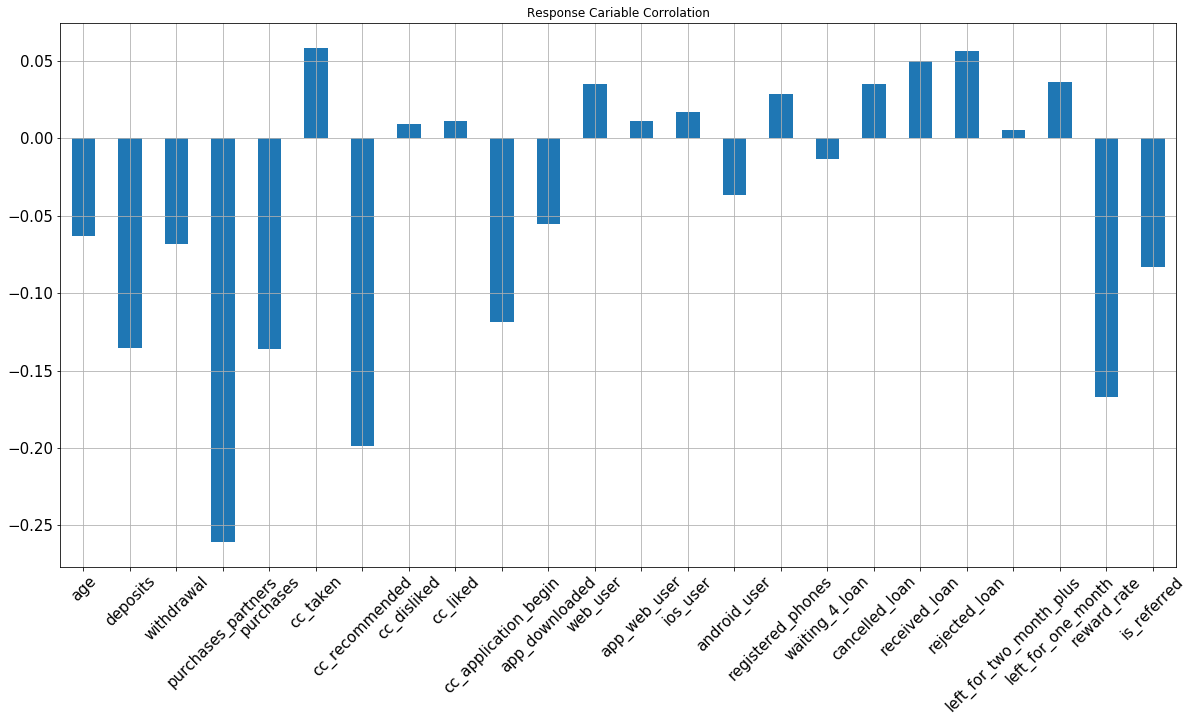

In [111]:
#creates a corolation plot
dataset_new = dataset.drop(columns=['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(dataset.churn).plot.bar(
    figsize=(20,10), title='Response Cariable Corrolation', fontsize=15, rot=45, grid=True)

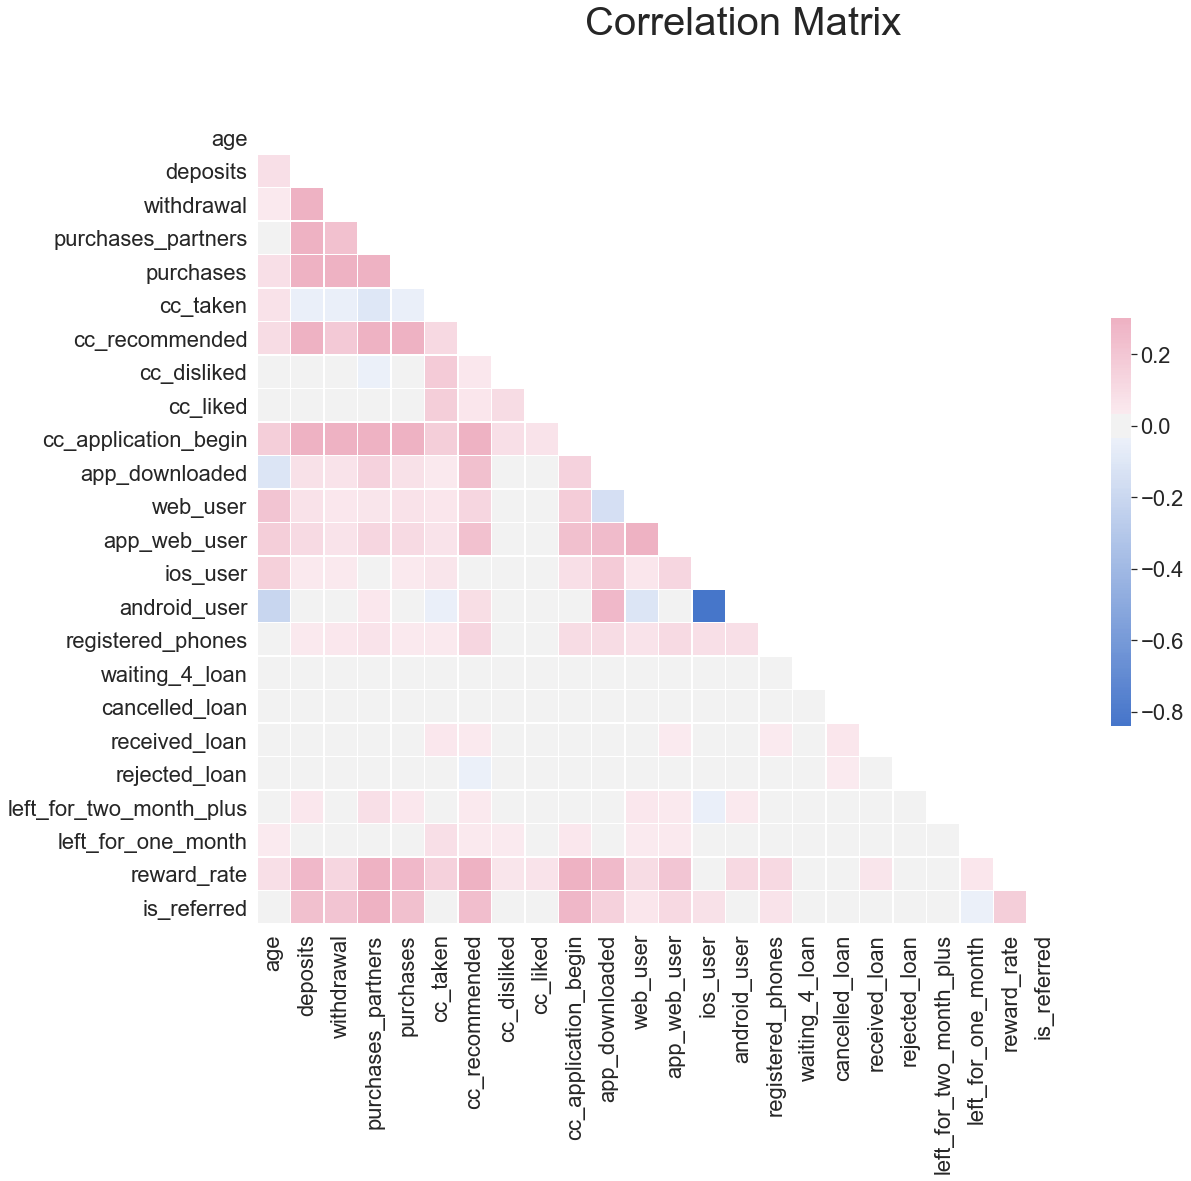

In [113]:
#correlation matrix
sns.set(style='white', font_scale = 2)
#compute the correlation matrix
corr = dataset.drop(columns =["churn", "user"]).corr()
#Generate mask for upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
#set up the matplotlib figure
fig, axes = plt.subplots(figsize = (18, 15))
fig.suptitle("Correlation Matrix", fontsize = 40)
#create a custom diverging colormap
cmap = sns.diverging_palette(255, 0, as_cmap = True)
#draws the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [114]:
dataset = dataset.drop(columns=['app_web_user'])

In [115]:
dataset.to_csv('new_churn_data.csv')